In [258]:
import gymnasium as gym
import highway_env
import numpy as np
import random

def is_in_visited_states(state, visited_states, threshold=0.0001):
    for i, visited_state in enumerate(visited_states):
        if np.linalg.norm(np.array(state) - np.array(visited_state)) < threshold:
            return True, i  # Return index if found
    return False, None


# Create the environment
config = {
    "observation": {
        "type": "Kinematics",
        "features": ["x", "y", "vx", "vy"],
        "features_range": {
            "x": [-100, 100],
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20]
        },
        "absolute": False,
        "lanes_count": 2,
        "vehicles_count": 2,
        "initial_lane_id": 0
    },
        "order": "sorted",
        "lanes_count": 2,
        "vehicles_count": 1,
        "collision_reward": -20,#-10
        "high_speed_reward": 0,#0
        "lane_change_reward": 0,#0
        "right_lane_reward": 0,
        "on_road_reward": -20,
        "initial_lane_id": 0,
        "absolute": False
}
env = gym.make('highway-v0', config=config)

# Parameters
num_episodes = 30000
alpha = 0.05       # Learning rate
gamma = 0.97      # Discount factor

# List to store total rewards and actions for each episode
state_policy = []
state_V = []
total_rewards = []
action_length = []
visited_states = []
count_new=0
count_old=0
count_old0 = 0
count_old1 = 0
count_old2 = 0
count_old3 = 0
count_old4 = 0
countfive = 0

In [259]:
import copy
epsilon = 1.0         # Initial exploration rate
min_epsilon = 0.01    # Minimum exploration rate
epsilon_decay = 0.99 # Decay rate per episode
# Training loop
for episode in range(num_episodes):
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    num_action = 0
    state, _ = env.reset()  # Adjusted to unpack only the state
    done = False
    episode_reward = 0  # Initialize total reward for the current episode

    while not done:
        next_state_V0 = 0
        next_state_V1 = 0
        next_state_V2 = 0
        next_state_V3 = 0
        next_state_V4 = 0
        state_tuple = np.round(state, 2)
        # print(state_tuple)
        check9, idx9 = is_in_visited_states(state_tuple, visited_states)
        if not check9:
            # print("new")
            count_new += 1
            visited_states.append(state_tuple)
            check9, idx9 = is_in_visited_states(state_tuple, visited_states)
            state_V.append(0)
            action0 = 0
            action1 = 1
            action2 = 2
            action3 = 3
            action4 = 4
            # print("|")
            # print(state)
            env_checkpoint = copy.deepcopy(env)
            next_state0, reward0, done0, additional_info0, info0 = env.step(action0)
            # print(next_state0)
            env = copy.deepcopy(env_checkpoint)
            next_state1, reward1, done1, additional_info1, info1 = env.step(action1)
            # print(next_state1)
            env = copy.deepcopy(env_checkpoint)
            next_state2, reward2, done2, additional_info2, info2 = env.step(action2)
            # print(next_state2)
            env = copy.deepcopy(env_checkpoint)
            next_state3, reward3, done3, additional_info3, info3 = env.step(action3)
            # print(next_state3)
            env = copy.deepcopy(env_checkpoint)
            next_state4, reward4, done4, additional_info4, info4 = env.step(action4)
            # print(next_state4)
            # print("/")
            env = copy.deepcopy(env_checkpoint)
            if done0 == True:
              reward0 = -1
            if done1 == True:
              reward1 = -1
            if done2 == True:
              reward2 = -1
            if done3 == True:
              reward3 = -1
            if done4 == True:
              reward4 = -1
            NS0 = np.round(next_state0, 2)
            NS1 = np.round(next_state1, 2)
            NS2 = np.round(next_state2, 2)
            NS3 = np.round(next_state3, 2)
            NS4 = np.round(next_state4, 2)
            check0, idx0 = is_in_visited_states(NS0, visited_states)
            check1, idx1 = is_in_visited_states(NS1, visited_states)
            check2, idx2 = is_in_visited_states(NS2, visited_states)
            check3, idx3 = is_in_visited_states(NS3, visited_states)
            check4, idx4 = is_in_visited_states(NS4, visited_states)
            if check0:
                count_old0 += 1
                next_state_V0 = state_V[idx0]
            else:
                next_state_V0 = 0
                if reward0 == -1:
                  next_state_V0 = -1
            if check1:
                count_old1 += 1
                next_state_V1 = state_V[idx1]
            else:
                next_state_V1 = 0
                if reward1 == -1:
                  next_state_V1 = -1
            if check2:
                count_old2 += 1
                next_state_V2 = state_V[idx2]
            else:
                next_state_V2 = 0
                if reward2 == -1:
                  next_state_V2 = -1
            if check3:
                count_old3 += 1
                next_state_V3 = state_V[idx3]
            else:
                next_state_V3 = 0
                if reward3 == -1:
                  next_state_V3 = -1
            if check4:
                count_old4 += 1
                next_state_V4 = state_V[idx4]
            else:
                next_state_V4 = 0
                if reward4 == -1:
                  next_state_V4 = -1
            V0 = reward0 + gamma * next_state_V0
            V1 = reward1 + gamma * next_state_V1
            V2 = reward2 + gamma * next_state_V2
            V3 = reward3 + gamma * next_state_V3
            V4 = reward4 + gamma * next_state_V4
            action = np.argmax([V0, V1, V2, V3, V4])
            V0 = V0-state_V[idx9]
            V1 = V1-state_V[idx9]
            V2 = V2-state_V[idx9]
            V3 = V3-state_V[idx9]
            V4 = V4-state_V[idx9]
            # print(action)
            # print(action,V0,V1,V2)
            this_state_V = [V0, V1, V2, V3, V4]
            next_s = [next_state0, next_state1, next_state2, next_state3, next_state4]
            next_d = [done0, done1, done2, done3, done4]
            next_r = [reward0, reward1, reward2, reward3, reward4]
            next_add = [additional_info0, additional_info1, additional_info2, additional_info3, additional_info4]
            next_info = [info0, info1, info2, info3, info4]
            state_policy.append(action)
            state_V[idx9] = state_V[idx9] + alpha * this_state_V[action] 
            if num_action != 0:
              if done == True:
                state_V[idx9] = -2
            prev_state_idx = idx9
            if random.random() < epsilon and episode < 300:
                a = random.choice([0, 1, 2, 3, 4])  # Explore
            else:
                a = action  #explolite
            done = next_d[a]
            state = next_s[a]
            if a == 0:
                env.step(action0)
            if a == 1:
                env.step(action1)
            if a == 2:
                env.step(action2)
            if a == 3:
                env.step(action3)
            if a == 4:
                env.step(action4)
            # if tuple(np.round(state.flatten(), 2)) not in visited_states:
            #   visited_states.append(tuple(np.round(state.flatten(), 2)))
            #   state_V.append(0)
            #   state_policy.append(0)
            # else:
            #    state_V[visited_states.index(tuple(np.round(state.flatten(), 2)))] = -3.94
            # if episode <= 15000:
            #   a = random.choice([0, 1, 2, 3, 4])
            #   state = next_s[a]
            # print(a, action, V0, V1, V2, V3, V4)
            print(a, action, V0, V1, V2, V3, V4)
            # print(reward0, reward1, reward2, reward3, reward4)
            reward = next_r[a]
            additional_info = next_add[a]
            info = next_info[a]
            num_action += 1
            episode_reward += reward
        else:
            count_old += 1
            action0 = 0
            action1 = 1
            action2 = 2
            action3 = 3
            action4 = 4
            env_checkpoint = copy.deepcopy(env)
            next_state0, reward0, done0, additional_info0, info0 = env.step(action0)
            env = copy.deepcopy(env_checkpoint)
            next_state1, reward1, done1, additional_info1, info1 = env.step(action1)
            env = copy.deepcopy(env_checkpoint)
            next_state2, reward2, done2, additional_info2, info2 = env.step(action2)
            env = copy.deepcopy(env_checkpoint)
            next_state3, reward3, done3, additional_info3, info3 = env.step(action3)
            env = copy.deepcopy(env_checkpoint)
            next_state4, reward4, done4, additional_info4, info4 = env.step(action4)
            env = copy.deepcopy(env_checkpoint)
            if done0 == True:
              reward0 = -1
            if done1 == True:
              reward1 = -1
            if done2 == True:
              reward2 = -1
            if done3 == True:
              reward3 = -1
            if done4 == True:
              reward4 = -1
            NS0 = np.round(next_state0, 2)
            NS1 = np.round(next_state1, 2)
            NS2 = np.round(next_state2, 2)
            NS3 = np.round(next_state3, 2)
            NS4 = np.round(next_state4, 2)
            check0, idx0 = is_in_visited_states(NS0, visited_states)
            check1, idx1 = is_in_visited_states(NS1, visited_states)
            check2, idx2 = is_in_visited_states(NS2, visited_states)
            check3, idx3 = is_in_visited_states(NS3, visited_states)
            check4, idx4 = is_in_visited_states(NS4, visited_states)
            if check0:
                count_old0 += 1
                next_state_V0 = state_V[idx0]
            else:
                next_state_V0 = 0
                if reward0 == -1:
                  next_state_V0 = -1
            if check1:
                count_old1 += 1
                next_state_V1 = state_V[idx1]
            else:
                next_state_V1 = 0
                if reward1 == -1:
                  next_state_V1 = -1
            if check2:
                count_old2 += 1
                next_state_V2 = state_V[idx2]
            else:
                next_state_V2 = 0
                if reward2 == -1:
                  next_state_V2 = -1
            if check3:
                count_old3 += 1
                next_state_V3 = state_V[idx3]
            else:
                next_state_V3 = 0
                if reward3 == -1:
                  next_state_V3 = -1
            if check4:
                count_old4 += 1
                next_state_V4 = state_V[idx4]
            else:
                next_state_V4 = 0
                if reward4 == -1:
                  next_state_V4 = -1
            V0 = reward0 + gamma * next_state_V0
            V1 = reward1 + gamma * next_state_V1
            V2 = reward2 + gamma * next_state_V2
            V3 = reward3 + gamma * next_state_V3
            V4 = reward4 + gamma * next_state_V4
            action = np.argmax([V0, V1, V2, V3, V4])
            V0 = V0-state_V[idx9]
            V1 = V1-state_V[idx9]
            V2 = V2-state_V[idx9]
            V3 = V3-state_V[idx9]
            V4 = V4-state_V[idx9]
            # print(action,V0,V1,V2)
            this_state_V = [V0, V1, V2, V3, V4]
            next_s = [next_state0, next_state1, next_state2, next_state3, next_state4]
            next_d = [done0, done1, done2, done3, done4]
            next_r = [reward0, reward1, reward2, reward3, reward4]
            next_add = [additional_info0, additional_info1, additional_info2, additional_info3, additional_info4]
            next_info = [info0, info1, info2, info3, info4]
            state_policy[idx9] = action
            state_V[idx9] = state_V[idx9] + alpha * this_state_V[action]
            if num_action != 0:
              if done == True:
                state_V[idx9] = -2
            prev_state_idx = idx9
            if random.random() < epsilon and episode < 300:
                a = random.choice([0, 1, 2, 3, 4])  # Explore
            else:
                a = action  #explolite
            done = next_d[a]
            state = next_s[a]
            if a == 0:
                env.step(action0)
            if a == 1:
                env.step(action1)
            if a == 2:
                env.step(action2)
            if a == 3:
                env.step(action3)
            if a == 4:
                env.step(action4)
            # if a == 0:
            #   next_state0, reward0, done0, additional_info0, info0 = env.step(action0)
               
            # if tuple(np.round(state.flatten(), 2)) not in visited_states:
            #    visited_states.append(tuple(np.round(state.flatten(), 2)))
            #    state_V.append(-3.94)
            #    state_policy.append(0)
            # else:
            #    state_V[visited_states.index(tuple(np.round(state.flatten(), 2)))] = -3.94
            # if episode <= 15000:
            #   a = random.choice([0, 1, 2, 3, 4])
            #   state = next_s[a]
            # print(a, action, V0, V1, V2, V3, V4)
            print(a, action, V0, V1, V2, V3, V4)
            # print(reward0, reward1, reward2, reward3, reward4)
            # print(done0, done1, done2, done3, done4)
            reward = next_r[a]
            additional_info = next_add[a]
            info = next_info[a]
            num_action += 1
            episode_reward += reward
        # if num_action <= 50 and num_action>=50:
        #    countfive+=1
        if additional_info:
          done = True
        # if done:
        #    print(csjdb)
    total_rewards.append(episode_reward)
    action_length.append(num_action)
    print("Number of episde:                 ",episode,num_action)

1 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
2 0 0.0 0.0 0.0 0.0 0.0
2 1 -1.97 0.0 0.0 0.0 0.0
2 1 -1.97 0.0 0.0 0.0 0.0
1 0 0.0 0.0 0.0 0.0 0.0
4 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
4 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
2 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
1 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
4 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
1 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
2 0 0.0 0.0 0.0 0.0 0.0
1 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
4 0 0.0 0.0 0.0 0.0 0.0
2 0 0.0 0.0 0.0 0.0 0.0
1 0 0.0 0.0 0.0 0.0 0.0
2 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
2 0 0.0 0.0 0.0 0.0 0.0
1 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
2 0 0.0 0.0 0.0 0.0 0.0
4 0 0.0 0.0 0.0 0.0 0.0
3 0 0.0 0.0 0.0 0.0 0.0
0 0 0.0 0.0 0.0 0.0 0.0
Number of episde:                  0

KeyboardInterrupt: 

In [262]:
import pickle
# Save lists to files
with open("state_policy.pkl", "wb") as f:
    pickle.dump(state_policy, f)
with open("state_V.pkl", "wb") as f:
    pickle.dump(state_V, f)
with open("total_rewards.pkl", "wb") as f:
    pickle.dump(total_rewards, f)
with open("action_length.pkl", "wb") as f:
    pickle.dump(action_length, f)
with open("visited_states.pkl", "wb") as f:
    pickle.dump(visited_states, f)

In [261]:
print(len(visited_states))
print(len(state_V))
print(len(state_policy))
print(len(total_rewards))
print(len(action_length))
print(count_new,count_old,count_old0,count_old1,count_old2, count_old3, count_old4)

3997
3997
3997
4005
4005
3997 153317 144614 151590 108655 108061 113541


In [ ]:
import pickle
with open("state_policy.pkl", "rb") as f:
    state_policy = pickle.load(f)
with open("state_V.pkl", "rb") as f:
    state_V = pickle.load(f)
with open("total_rewards.pkl", "rb") as f:
    total_rewards = pickle.load(f)
with open("action_length.pkl", "rb") as f:
    action_length = pickle.load(f)
with open("visited_states.pkl", "rb") as f:
    visited_states = pickle.load(f)

In [278]:
a = [[1.  , 0.  , 1.  , 0.  ],
       [0.39, 0.04, 0.12, 0.  ]]
t,r = is_in_visited_states(a, visited_states)
print(np.linalg.norm(a - visited_states[r]))
if t:
    print(r, visited_states[r])


1.458183507090383e-08
19 [[1.   0.   1.   0.  ]
 [0.39 0.04 0.12 0.  ]]


In [263]:
print(state_policy)
print(state_V)
print(total_rewards)
print(visited_states)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [273]:
test_action_length = 0
reward1 = 0
state, _ = env.reset()
done = False

while not done:
    s1 = np.round(state,2)
    print("state:", s1)
    c1, c2 = is_in_visited_states(s1,visited_states)
    if c1:
      action = state_policy[c2]
      print("|",c2,"|")
    else:
      action = env.action_space.sample()
      print("?")
    n_state, reward, done, additional_info, info = env.step(action)
    test_action_length += 1
    print(action, reward)
    a = n_state
    # print(a)
    reward1 += reward
    state = n_state
    if additional_info:
      done = True
print(test_action_length,reward1)

state: [[ 1.    0.    1.    0.  ]
 [ 0.28  0.   -0.14  0.  ]]
| 574 |
0 0.0
state: [[ 1.    0.    1.    0.  ]
 [ 0.25  0.   -0.14  0.  ]]
| 575 |
0 0.0
state: [[ 1.    0.    1.    0.  ]
 [ 0.23  0.   -0.14  0.  ]]
| 2789 |
0 0.0
state: [[ 1.    0.    1.    0.  ]
 [ 0.2   0.   -0.14  0.  ]]
| 577 |
0 0.0
state: [[ 1.    0.    1.    0.  ]
 [ 0.17  0.   -0.14  0.  ]]
| 578 |
0 0.0
state: [[ 1.    0.    1.    0.  ]
 [ 0.14  0.   -0.14  0.  ]]
| 579 |
0 0.0
state: [[ 1.    0.    1.    0.  ]
 [ 0.11  0.   -0.14  0.  ]]
| 1594 |
0 0.0
state: [[ 1.    0.    1.    0.  ]
 [ 0.09  0.   -0.14  0.  ]]
| 581 |
2 0.0
state: [[ 1.    0.03  1.    0.08]
 [ 0.06 -0.03 -0.14 -0.08]]
| 1867 |
1 0.0
state: [[ 1.    0.04  1.    0.01]
 [ 0.03 -0.04 -0.14 -0.01]]
| 3485 |
1 0.0
state: [[ 1.    0.04  1.    0.  ]
 [ 0.01 -0.04 -0.14 -0.  ]]
| 3171 |
1 0.0
state: [[ 1.    0.04  1.    0.  ]
 [-0.02 -0.04 -0.14 -0.  ]]
| 3080 |
1 0.0
state: [[ 1.    0.04  1.    0.  ]
 [-0.05 -0.04 -0.14 -0.  ]]
| 3081 |
0 0.0
state

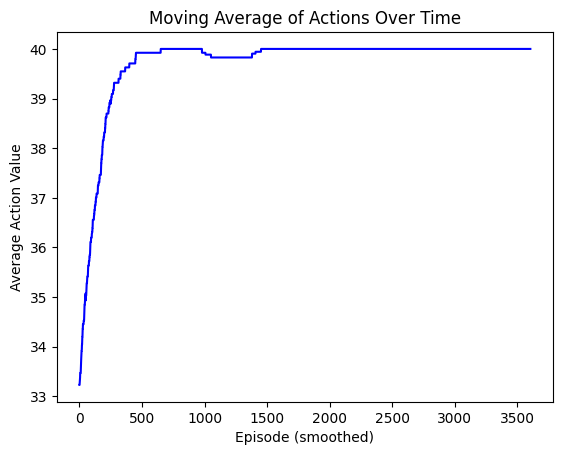

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate a moving average with a window of 50
window_size = 400
moving_avg = np.convolve(action_length, np.ones(window_size)/window_size, mode='valid')

# Plot the moving average of actions over time
plt.plot(moving_avg, color='b')
plt.title("Moving Average of Actions Over Time")
plt.xlabel("Episode (smoothed)")
plt.ylabel("Average Action Value")
plt.show()
